In [44]:
!pip install torch==2.2.0 torchtext==0.17.0
!pip install portalocker==3.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [1]:
!pip install gensim
!pip install gensim torch torchvision scikit-learn pandas

In [41]:
!pip install torchtext

In [9]:
# Import Library
import pandas as pd  # Untuk memanipulasi dan menganalisis data menggunakan DataFrame.
import torch  # Untuk menggunakan PyTorch, framework deep learning.
import numpy as np  # Untuk operasi matematis dan array, sering digunakan dengan PyTorch.
from torch.utils.data import Dataset, DataLoader  # Untuk membuat Dataset kustom dan memuat data dalam batch.
from torch import nn  # Untuk mengimpor modul neural network di PyTorch (seperti layer-layer neural network).
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah label kategorikal menjadi format numerik.
from sklearn.metrics import accuracy_score  # Untuk menghitung akurasi dari prediksi model.
import os  # Untuk berinteraksi dengan sistem file (misalnya, memeriksa path file).

In [10]:
# Cek device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Memeriksa apakah GPU tersedia dan memilih antara GPU (cuda) atau CPU.
print(f"Using device: {device}")  # Mencetak device yang digunakan (GPU atau CPU).

Using device: cuda


In [12]:
# Path Dataset dan GloVe
train_dataset = "/content/train.csv"  # Mendefinisikan path untuk dataset pelatihan yang disimpan dalam file CSV.
test_dataset = "/content/test.csv"    # Mendefinisikan path untuk dataset pengujian yang disimpan dalam file CSV.
GLOVE_PATH = "/content/glove.6B.100d.txt"  # Menyimpan path ke file GloVe dengan dimensi embedding 100.
EMBEDDING_DIM = 100  # Mendefinisikan dimensi embedding untuk GloVe yang akan digunakan (100 dimensi).

In [13]:
# Load Dataset
train_df = pd.read_csv(train_dataset, header=None, names=["class", "title", "description"])  # Membaca file CSV untuk dataset pelatihan, tanpa header dan memberikan nama kolom: "class", "title", "description"
test_df = pd.read_csv(test_dataset, header=None, names=["class", "title", "description"])  # Membaca file CSV untuk dataset pengujian, tanpa header dan memberikan nama kolom: "class", "title", "description"

In [14]:
# Gabungkan title dan description
train_df["text"] = train_df["title"].fillna("") + ". " + train_df["description"].fillna("")  # Gabungkan title dan description pada data pelatihan (train_df)
test_df["text"] = test_df["title"].fillna("") + ". " + test_df["description"].fillna("")  # Gabungkan title dan description pada data pengujian (test_df)

In [15]:
# Encode label
label_encoder = LabelEncoder()  # Membuat objek LabelEncoder yang digunakan untuk mengubah label kategorikal menjadi angka.
train_df["label"] = label_encoder.fit_transform(train_df["class"])  # Mengubah kolom "class" di train_df menjadi angka, hasilnya disimpan di kolom "label".
test_df["label"] = label_encoder.transform(test_df["class"])  # Mengubah kolom "class" di test_df menjadi angka menggunakan LabelEncoder yang sudah dipelajari dari train_df.

In [16]:
print("Sample data:")  # Mencetak teks 'Sample data:' untuk menunjukkan bahwa data yang ditampilkan berikutnya adalah sampel dari dataset.
print(train_df.head())  # Mencetak 5 baris pertama dari dataset train_df untuk memeriksa bentuk dan sample data.

Sample data:
   class                                              title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                                text  label  
0  Wall St. Bears Claw Back Into the Black (Reute...      2  
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2  
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2  
3  Iraq Halts Oil Expor

In [17]:
# Load GloVe embeddings
def load_glove_embeddings(glove_path, embedding_dim):
    # Menyediakan dictionary untuk mapping dari kata ke index dan memasukkan token <PAD> dan <UNK> yang memiliki index 0 dan 1
    word_to_idx = {"<PAD>": 0, "<UNK>": 1}

    # Menyediakan list untuk menyimpan vektor embedding, dimulai dengan vektor kosong untuk <PAD> dan vektor acak untuk <UNK>
    embedding_matrix = [np.zeros(embedding_dim), np.random.uniform(-0.25, 0.25, embedding_dim)]

    # Mencetak pesan bahwa GloVe embeddings sedang dimuat
    print("Loading GloVe embeddings...")

    # Membuka file GloVe untuk membaca vektor embedding
    with open(glove_path, "r", encoding="utf-8") as f:
        # Membaca file baris per baris
        for line in f:
            parts = line.split()  # Memisahkan kata dan vektor embeddingnya
            word = parts[0]  # Kata pertama adalah kata itu sendiri
            vector = np.array(parts[1:], dtype=np.float32)  # Sisanya adalah vektor angka, yang dikonversi ke array numpy

            # Menambahkan kata tersebut ke dictionary dengan index yang sesuai
            word_to_idx[word] = len(word_to_idx)

            # Menambahkan vektor embedding dari kata ke embedding matrix
            embedding_matrix.append(vector)

    # Mengubah embedding matrix menjadi array numpy
    embedding_matrix = np.array(embedding_matrix)

    # Mencetak pesan bahwa GloVe embeddings telah berhasil dimuat
    print("GloVe embeddings loaded successfully!")

    # Mengembalikan dictionary word_to_idx dan tensor embedding_matrix sebagai hasil
    return word_to_idx, torch.tensor(embedding_matrix, dtype=torch.float)

# Memanggil fungsi untuk memuat GloVe embeddings
word_to_idx, embedding_matrix = load_glove_embeddings(GLOVE_PATH, EMBEDDING_DIM)

# Mencetak ukuran dari embedding matrix untuk memverifikasi
print(f"Embedding matrix shape: {embedding_matrix.shape}")

Loading GloVe embeddings...
GloVe embeddings loaded successfully!
Embedding matrix shape: torch.Size([400002, 100])


In [18]:
# Tokenizer sederhana
def tokenize(text):
    # Mengubah semua huruf dalam teks menjadi huruf kecil (lowercase) agar tidak peka terhadap kapitalisasi
    return text.lower().split()  # Memisahkan teks berdasarkan spasi untuk mendapatkan kata-kata individual

In [23]:
# Mendefinisikan kelas AGNewsDataset yang merupakan subclass dari Dataset
class AGNewsDataset(Dataset):
    # Konstruktor untuk menginisialisasi objek AGNewsDataset
    def __init__(self, texts, labels, word_to_idx, max_len):
        # Menyimpan parameter ke dalam variabel kelas
        self.texts = texts           # Menyimpan daftar teks (judul + deskripsi) untuk dataset
        self.labels = labels         # Menyimpan daftar label untuk setiap teks
        self.word_to_idx = word_to_idx  # Menyimpan dictionary untuk mapping kata ke index
        self.max_len = max_len       # Menyimpan panjang maksimal untuk padding/truncating

    # Fungsi untuk mengembalikan panjang dataset (jumlah sampel)
    def __len__(self):
        return len(self.texts)  # Mengembalikan jumlah teks yang ada dalam dataset

    # Fungsi untuk mengambil item berdasarkan index
    def __getitem__(self, idx):
        # Mengambil teks dan label berdasarkan index
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisasi teks dan konversi token ke indeks menggunakan word_to_idx
        tokens = tokenize(text)  # Memanggil fungsi tokenize untuk memisahkan teks menjadi kata-kata (tokens)
        # Konversi setiap token ke indeks menggunakan dictionary word_to_idx
        # Jika kata tidak ditemukan di dictionary, maka menggunakan indeks 1 (token <UNK>)
        token_ids = [self.word_to_idx.get(token, 1) for token in tokens]

        # Padding atau pemotongan teks agar memiliki panjang yang konsisten
        if len(token_ids) < self.max_len:
            # Jika panjang token kurang dari max_len, tambahkan <PAD> (indeks 0) hingga panjangnya mencapai max_len
            token_ids += [0] * (self.max_len - len(token_ids))  # 0 = "<PAD>"
        else:
            # Jika panjang token lebih dari max_len, potong token agar panjangnya tidak melebihi max_len
            token_ids = token_ids[:self.max_len]

        # Mengembalikan dictionary yang berisi input_ids dan label sebagai tensor
        # Input_ids adalah token yang sudah di-padded atau dipotong
        # Label adalah label yang sesuai dengan teks
        return {
            "input_ids": torch.tensor(token_ids, dtype=torch.long),  # Mengubah token_ids ke tensor
            "label": torch.tensor(label, dtype=torch.long)  # Mengubah label ke tensor
        }

In [26]:
# Menentukan panjang maksimal untuk tokenisasi (panjang input maksimal yang diterima oleh model)
MAX_LEN = 100  # Maksimal panjang sequence (jumlah token) untuk setiap teks

# Membuat dataset untuk data pelatihan dengan menggunakan AGNewsDataset
train_dataset = AGNewsDataset(train_df["text"].values, train_df["label"].values, word_to_idx, MAX_LEN)
# Membuat dataset untuk data pengujian dengan menggunakan AGNewsDataset
test_dataset = AGNewsDataset(test_df["text"].values, test_df["label"].values, word_to_idx, MAX_LEN)

# Membuat DataLoader untuk train_dataset dengan ukuran batch 32 dan shuffle data (acak urutan data untuk setiap epoch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Membuat DataLoader untuk test_dataset dengan ukuran batch 32 (tanpa shuffle karena data pengujian tidak perlu diacak)
test_loader = DataLoader(test_dataset, batch_size=32)

In [27]:
class TransformerClassifier(nn.Module):
    # Inisialisasi model TransformerClassifier
    def __init__(self, embedding_matrix, n_heads, hidden_size, n_encoders, n_classes, max_len=100, dropout=0.5):
        # Memanggil constructor kelas induk nn.Module
        super(TransformerClassifier, self).__init__()

        # Mendapatkan ukuran embedding matrix (vocab_size dan embedding_dim)
        vocab_size, embedding_dim = embedding_matrix.shape

        # Load GloVe embeddings ke dalam layer embedding
        # Menggunakan embedding_matrix yang sudah dilatih sebelumnya, dan menentukan agar embedding tidak diubah (freeze=True)
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=True)

        # Positional Encoding: Membuat posisi token dalam urutan input agar model bisa mengenali urutan kata
        # Positional encoding ini akan dipelajari dan ditambahkan ke embedding kata
        self.positional_encoding = nn.Embedding(max_len, embedding_dim)

        # Transformer Encoder Layer
        # nn.TransformerEncoderLayer digunakan untuk membangun layer dasar dari encoder Transformer
        # Parameter:
        #   - d_model: Dimensi embedding
        #   - nhead: Jumlah head di multi-head attention
        #   - dim_feedforward: Ukuran hidden layer feedforward dalam encoder
        #   - dropout: Probabilitas dropout untuk regularisasi
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=n_heads,
            dim_feedforward=hidden_size,
            dropout=dropout
        )

        # Menggunakan Transformer Encoder, yang terdiri dari beberapa encoder layer
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=n_encoders)

        # Fully Connected Layer (FC) untuk klasifikasi
        # Setelah transformasi oleh Transformer, data akan dipadatkan (flatten) menjadi vektor panjang
        # Kemudian, layer ini menghasilkan prediksi kelas
        self.fc = nn.Linear(embedding_dim * max_len, n_classes)

    def forward(self, x):
        # Menghitung embedding dari input x
        # x adalah tensor dengan indeks token, yang diubah menjadi embedding menggunakan self.embedding
        x = self.embedding(x) + self.positional_encoding(torch.arange(MAX_LEN, device=DEVICE))

        # Menambahkan positional encoding ke embedding kata
        # Positional encoding memberikan informasi tentang posisi token dalam urutan kalimat

        # Menyusun input untuk transformer: Transformer mengharuskan input dalam bentuk (seq_len, batch_size, embedding_dim)
        # Permute untuk mengubah urutan dimensi dari (batch_size, seq_len, embedding_dim) ke (seq_len, batch_size, embedding_dim)
        x = self.encoder(x.permute(1, 0, 2))  # (seq_len, batch_size, emb_dim)

        # Mengubah output kembali menjadi bentuk (batch_size, seq_len * emb_dim)
        # Setelah melewati transformer encoder, hasil outputnya harus diratakan (flatten) agar bisa diproses oleh fully connected layer
        x = x.permute(1, 0, 2).contiguous().view(x.size(1), -1)  # Flatten

        # Melalui fully connected layer untuk mendapatkan prediksi kelas
        return self.fc(x)  # Output ukuran [batch_size, n_classes]

In [28]:
# Inisialisasi Model
model = TransformerClassifier(
    embedding_matrix=embedding_matrix,  # Matriks embedding yang berisi representasi kata-kata dari GloVe
    n_heads=4,  # Jumlah "attention heads" dalam layer Transformer Encoder, yaitu 4
    hidden_size=128,  # Ukuran dimensi untuk hidden layer feedforward, yaitu 128 unit
    n_encoders=2,  # Jumlah layer encoder Transformer, yaitu 2 layer
    n_classes=len(label_encoder.classes_)  # Jumlah kelas untuk output layer, berdasarkan banyaknya kelas di label encoder
).to(device)  # Memindahkan model ke perangkat yang sesuai (GPU atau CPU) sesuai dengan `device`

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [29]:
# Optimizer dan Loss

# Optimizer menggunakan Adam untuk mengoptimalkan parameter model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  # Inisialisasi optimizer Adam

# Fungsi loss untuk klasifikasi multi-kelas
criterion = nn.CrossEntropyLoss()  # Fungsi loss yang digunakan adalah CrossEntropyLoss

In [30]:
# Training Function
def train_epoch(model, data_loader, optimizer, criterion):
    # Set model ke mode training
    model.train()  # Mengaktifkan mode training pada model, yang mengaktifkan fitur-fitur seperti dropout dan batch normalization.

    # Inisialisasi total loss untuk menghitung rata-rata loss pada epoch ini
    total_loss = 0  # Variabel untuk menyimpan total loss yang akan dihitung rata-ratanya

    # Iterasi untuk setiap batch data dalam DataLoader
    for batch in data_loader:
        # Mengambil input dan label dari batch
        input_ids = batch["input_ids"].to(DEVICE)  # Memindahkan data input ke device (GPU atau CPU)
        labels = batch["label"].to(DEVICE)  # Memindahkan label ke device

        # Mengatur gradien ke nol sebelum menghitung gradien baru
        optimizer.zero_grad()  # Menyeting gradien menjadi nol, ini penting agar gradien tidak bertambah (accumulate) dari iterasi sebelumnya

        # Melakukan prediksi dengan model
        outputs = model(input_ids)  # Menghitung output model berdasarkan input_ids

        # Menghitung loss antara output prediksi dan label yang benar
        loss = criterion(outputs, labels)  # Menghitung loss antara hasil prediksi dan label yang benar

        # Melakukan backpropagation untuk menghitung gradien
        loss.backward()  # Menghitung gradien untuk semua parameter model berdasarkan loss yang dihitung

        # Mengupdate parameter model menggunakan optimizer
        optimizer.step()  # Mengupdate parameter model menggunakan gradien yang dihitung dengan algoritma optimasi (misalnya Adam)

        # Menambahkan loss saat ini ke total_loss
        total_loss += loss.item()  # Menambahkan nilai loss ke total_loss untuk menghitung rata-rata

    # Mengembalikan rata-rata loss untuk seluruh epoch
    return total_loss / len(data_loader)  # Mengembalikan total loss dibagi dengan jumlah batch untuk mendapatkan rata-rata loss

In [31]:
# Evaluation function
def evaluate(model, data_loader):
    # Set model ke mode evaluasi (non-training)
    model.eval()  # Mengaktifkan mode evaluasi pada model, yang mematikan fitur-fitur seperti dropout dan batch normalization.

    # Inisialisasi list untuk menyimpan prediksi dan label sebenarnya
    predictions, true_labels = [], []  # Untuk menyimpan hasil prediksi dan label sebenarnya sepanjang evaluasi

    # Nonaktifkan penghitungan gradien selama evaluasi (hemat memori)
    with torch.no_grad():  # Membungkus kode dalam konteks ini untuk menonaktifkan perhitungan gradien yang tidak diperlukan saat evaluasi
        # Iterasi setiap batch dalam DataLoader
        for batch in data_loader:
            # Mengambil input dan label dari batch
            input_ids = batch["input_ids"].to(device)  # Memindahkan data input ke device (GPU atau CPU)
            labels = batch["label"].to(device)  # Memindahkan label ke device

            # Melakukan inferensi dengan model (mendapatkan output prediksi)
            outputs = model(input_ids)  # Memasukkan input_ids ke dalam model untuk mendapatkan prediksi

            # Mengambil kelas dengan probabilitas tertinggi (prediksi)
            preds = torch.argmax(outputs, dim=1)  # Mengambil indeks kelas dengan probabilitas tertinggi di dimensi output

            # Menyimpan hasil prediksi dan label dalam list
            predictions.extend(preds.cpu().numpy())  # Menyimpan prediksi ke list setelah memindahkannya ke CPU
            true_labels.extend(labels.cpu().numpy())  # Menyimpan label sebenarnya ke list setelah memindahkannya ke CPU

    # Mengembalikan akurasi berdasarkan hasil prediksi dan label sebenarnya
    return accuracy_score(true_labels, predictions)  # Menghitung dan mengembalikan akurasi antara label sebenarnya dan prediksi

Epoch 1/5: Train Loss: 0.3173, Test Accuracy: 0.8893, Time: 36.08s
Epoch 2/5: Train Loss: 0.3113, Test Accuracy: 0.8930, Time: 34.37s
Epoch 3/5: Train Loss: 0.3052, Test Accuracy: 0.8721, Time: 40.14s
Epoch 4/5: Train Loss: 0.2985, Test Accuracy: 0.8911, Time: 34.01s
Epoch 5/5: Train Loss: 0.2933, Test Accuracy: 0.8958, Time: 35.58s


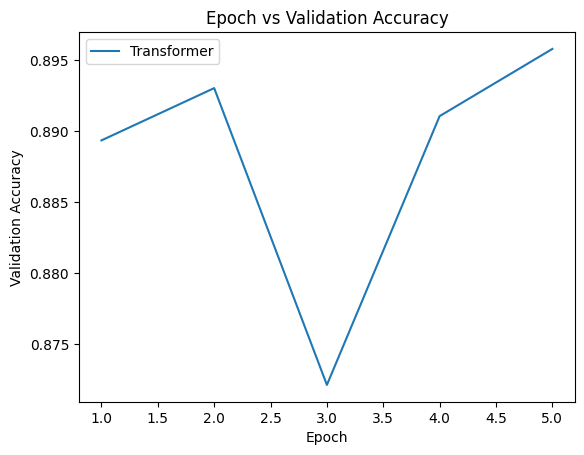

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize list to track results
transformer_results = []  # Menyiapkan list kosong untuk menyimpan hasil pelatihan tiap epoch (loss, akurasi, waktu)

epochs = 5  # Menentukan jumlah epoch pelatihan
for epoch in range(epochs):  # Melakukan iterasi untuk setiap epoch
    start_time = time.time()  # Menyimpan waktu mulai pelatihan epoch ini

    # Melatih model pada epoch ini dan mendapatkan nilai loss
    train_loss = train_epoch(model, train_loader, optimizer, criterion)  # Melatih model dan menghitung train loss

    # Menghitung akurasi pada data validasi (test set)
    acc = evaluate(model, test_loader)  # Menghitung akurasi model pada test set

    end_time = time.time()  # Menyimpan waktu selesai pelatihan epoch ini

    epoch_time = end_time - start_time  # Menghitung total waktu yang digunakan untuk satu epoch
    transformer_results.append({  # Menyimpan hasil pelatihan untuk epoch ini
        "epoch": epoch + 1,  # Nomor epoch (dimulai dari 1)
        "train_loss": train_loss,  # Nilai train loss untuk epoch ini
        "val_accuracy": acc,  # Akurasi pada data validasi untuk epoch ini
        "epoch_time": epoch_time  # Waktu yang digunakan untuk satu epoch
    })

    # Mencetak hasil epoch ini ke layar
    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Test Accuracy: {acc:.4f}, Time: {epoch_time:.2f}s")

# Convert to DataFrame for easier plotting
transformer_results_df = pd.DataFrame(transformer_results)  # Mengonversi hasil pelatihan ke dalam DataFrame untuk kemudahan analisis dan plotting

# Plotting
sns.lineplot(x='epoch', y='val_accuracy', data=transformer_results_df, label='Transformer')  # Membuat grafik garis akurasi validasi (val_accuracy) vs epoch
plt.title("Epoch vs Validation Accuracy")  # Menambahkan judul pada grafik
plt.xlabel("Epoch")  # Menambahkan label untuk sumbu X
plt.ylabel("Validation Accuracy")  # Menambahkan label untuk sumbu Y
plt.show()  # Menampilkan grafik

In [47]:
# Mengecek apakah GPU tersedia atau tidak
if torch.cuda.is_available():
    # Jika GPU tersedia, mencetak jumlah memori yang digunakan oleh model pada GPU
    print(f"Memori yang digunakan GPU: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    # Fungsi torch.cuda.memory_allocated() memberikan jumlah memori yang dialokasikan oleh GPU dalam byte.
    # Pembagian dengan 1e6 untuk mengkonversi byte ke megabyte (MB), dan format .2f untuk menampilkan 2 angka desimal.

    # Mencetak jumlah memori yang masih tersedia di GPU untuk alokasi lebih lanjut
    print(f"Memori yang tersedia GPU: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
    # Fungsi torch.cuda.memory_reserved() memberikan jumlah memori yang "dipesan" (reserved) di GPU.
    # Ini bukan memori yang sedang digunakan oleh model, tetapi total memori yang tersedia untuk model agar bisa digunakan nanti.
    # Pembagian dengan 1e6 untuk mengkonversi byte ke megabyte (MB) dan format .2f untuk menampilkan 2 angka desimal.

Memori yang digunakan GPU: 181.19 MB
Memori yang tersedia GPU: 255.85 MB


In [48]:
import time  # Mengimpor modul time untuk mengukur waktu

# Fungsi untuk menghitung waktu pemrosesan batch selama pelatihan atau pengujian
def time_batch_processing(data_loader, model, mode="train"):
    total_time = 0  # Menyimpan total waktu yang dibutuhkan untuk semua batch
    for batch in data_loader:  # Melakukan iterasi pada setiap batch dalam data_loader
        start = time.time()  # Mencatat waktu mulai untuk batch ini

        if mode == "train":  # Jika mode adalah 'train' (pelatihan)
            input_ids = batch["input_ids"].to(device)  # Memindahkan data input_ids ke device (CPU/GPU)
            labels = batch["label"].to(device)  # Memindahkan data label ke device
            optimizer.zero_grad()  # Mengatur gradien menjadi nol sebelum backward pass
            outputs = model(input_ids)  # Melakukan prediksi dengan model
            loss = criterion(outputs, labels)  # Menghitung loss berdasarkan output dan label
            loss.backward()  # Melakukan backward pass untuk menghitung gradien
            optimizer.step()  # Mengupdate bobot model berdasarkan gradien
        elif mode == "test":  # Jika mode adalah 'test' (pengujian)
            input_ids = batch["input_ids"].to(device)  # Memindahkan data input_ids ke device
            with torch.no_grad():  # Menonaktifkan perhitungan gradien selama pengujian untuk efisiensi
                _ = model(input_ids)  # Melakukan prediksi dengan model, tetapi tidak menyimpan output

        end = time.time()  # Mencatat waktu selesai untuk batch ini
        total_time += end - start  # Menghitung waktu yang dibutuhkan untuk batch ini dan menambahkannya ke total_time

    # Mengembalikan rata-rata waktu per batch (total waktu dibagi dengan jumlah batch)
    return total_time / len(data_loader)

# Mengukur waktu rata-rata per batch selama pelatihan
train_time_per_batch = time_batch_processing(train_loader, model, mode="train")

# Mengukur waktu rata-rata per batch selama pengujian
test_time_per_batch = time_batch_processing(test_loader, model, mode="test")

# Mencetak hasil waktu rata-rata per batch untuk pelatihan dan pengujian
print(f"Rata-rata waktu per batch (Train): {train_time_per_batch:.4f} detik")
print(f"Rata-rata waktu per batch (Test): {test_time_per_batch:.4f} detik")

Rata-rata waktu per batch (Train): 0.0073 detik
Rata-rata waktu per batch (Test): 0.0017 detik


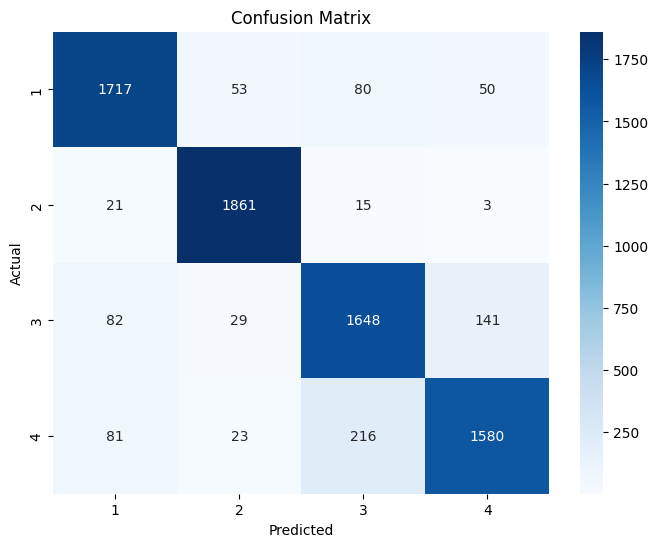

              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1900
           2       0.95      0.98      0.96      1900
           3       0.84      0.87      0.85      1900
           4       0.89      0.83      0.86      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [52]:
from sklearn.metrics import confusion_matrix, classification_report  # Mengimpor fungsi untuk menghitung confusion matrix dan classification report

true_labels, pred_labels = [], []  # Menyiapkan dua list kosong untuk menyimpan label yang sebenarnya dan prediksi model

# Mengumpulkan label sebenarnya dan prediksi
for batch in test_loader:  # Melakukan iterasi pada setiap batch dalam test_loader
    input_ids = batch["input_ids"].to(DEVICE)  # Memindahkan data input_ids ke device (CPU/GPU)
    labels = batch["label"].to(DEVICE)  # Memindahkan data label ke device

    with torch.no_grad():  # Menonaktifkan perhitungan gradien karena kita hanya ingin prediksi
        outputs = model(input_ids)  # Menggunakan model untuk menghasilkan prediksi dari input_ids
        preds = torch.argmax(outputs, dim=1)  # Mengambil label kelas dengan probabilitas tertinggi untuk setiap prediksi

    true_labels.extend(labels.cpu().numpy())  # Menambahkan label sebenarnya ke list true_labels (menggunakan .cpu().numpy() untuk mengonversi ke numpy array)
    pred_labels.extend(preds.cpu().numpy())  # Menambahkan label prediksi ke list pred_labels (menggunakan .cpu().numpy() untuk mengonversi ke numpy array)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)  # Menghitung confusion matrix antara true_labels dan pred_labels

plt.figure(figsize=(8, 6))  # Menyiapkan ukuran gambar untuk plot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  # Membuat heatmap untuk confusion matrix
plt.xlabel("Predicted")  # Menambahkan label untuk sumbu X
plt.ylabel("Actual")  # Menambahkan label untuk sumbu Y
plt.title("Confusion Matrix")  # Menambahkan judul pada plot
plt.show()  # Menampilkan plot confusion matrix

# Classification report
print(classification_report(true_labels, pred_labels, target_names=[str(c) for c in label_encoder.classes_]))  # Mencetak classification report untuk evaluasi model

In [35]:
# Save model
torch.save(model.state_dict(), "transformer_with_glove.pth")
print("Model saved successfully!")

Model saved successfully!
